In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('ba.xlsx')

In [4]:
df

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
0,2025-09-02,14:19:00,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38
1,2025-06-10,06:42:00,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28
2,2025-10-27,15:33:00,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40
3,2025-06-15,18:29:00,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54
4,2025-08-25,20:35:00,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-06-07,22:04:00,Evening,BA,BA7039,LHR,VIE,Austria,Europe,SHORT,A320,0,7,173,1,15,51
9996,2025-04-22,15:15:00,Afternoon,BA,BA9712,LHR,ORD,USA,North America,LONG,B777,8,49,178,1,0,0
9997,2025-08-16,06:11:00,Morning,BA,BA7513,LHR,HND,Japan,Asia,LONG,B777,0,32,304,0,4,19
9998,2025-10-24,22:02:00,Evening,BA,BA9958,LHR,DXB,UAE,Middle East,LONG,B787,8,48,200,1,10,38


In [11]:
df.TIER1_ELIGIBLE_PAX.sum()

6077

In [12]:
df.TIER2_ELIGIBLE_PAX.sum()

79519

In [ ]:
df.groupby(['ARRIVAL_REGION', 'TIME_OF_DAY']).size()

ARRIVAL_REGION  TIME_OF_DAY  TIER1_ELIGIBLE_PAX
Asia            Afternoon    0                      95
                             1                      41
                             2                      14
                             3                       2
                Evening      0                     134
                                                  ... 
North America   Morning      1                     216
                             2                     102
                             3                      29
                             4                      11
                             5                       7
Length: 105, dtype: int64

In [27]:
df.groupby(['ARRIVAL_REGION', 'TIME_OF_DAY','HAUL'])['TIER1_ELIGIBLE_PAX'].sum()

ARRIVAL_REGION  TIME_OF_DAY  HAUL 
Asia            Afternoon    LONG       75
                Evening      LONG      120
                Lunchtime    LONG       33
                Morning      LONG      151
Europe          Afternoon    SHORT     840
                Evening      SHORT    1054
                Lunchtime    SHORT     537
                Morning      SHORT    1266
Middle East     Afternoon    LONG      100
                Evening      LONG      130
                Lunchtime    LONG       43
                Morning      LONG      139
North America   Afternoon    LONG      370
                Evening      LONG      486
                Lunchtime    LONG      147
                Morning      LONG      586
Name: TIER1_ELIGIBLE_PAX, dtype: int64

In [30]:
df['grouping'] = df['ARRIVAL_REGION'].str[:3] + ' - ' + df['TIME_OF_DAY'].str[:3] + ' - ' + df['HAUL'].str[:3]

In [26]:
df.HAUL.value_counts()

HAUL
SHORT    5975
LONG     4025
Name: count, dtype: int64

In [31]:
df

,FLIGHT_DATE,FLIGHT_TIME,TIME_OF_DAY,AIRLINE_CD,FLIGHT_NO,DEPARTURE_STATION_CD,ARRIVAL_STATION_CD,ARRIVAL_COUNTRY,ARRIVAL_REGION,HAUL,AIRCRAFT_TYPE,FIRST_CLASS_SEATS,BUSINESS_CLASS_SEATS,ECONOMY_SEATS,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX,grouping
0,2025-09-02,14:19:00,Afternoon,BA,BA5211,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,10,38,Nor - Aft - LON
1,2025-06-10,06:42:00,Morning,BA,BA7282,LHR,LAX,USA,North America,LONG,B777,8,49,178,0,7,28,Nor - Mor - LON
2,2025-10-27,15:33:00,Afternoon,BA,BA1896,LHR,FRA,Germany,Europe,SHORT,A320,0,17,163,0,11,40,Eur - Aft - SHO
3,2025-06-15,18:29:00,Evening,BA,BA5497,LHR,IST,Turkey,Europe,SHORT,A320,0,8,172,0,16,54,Eur - Eve - SHO
4,2025-08-25,20:35:00,Evening,BA,BA1493,LHR,FRA,Germany,Europe,SHORT,A320,0,13,167,0,6,27,Eur - Eve - SHO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2025-06-07,22:04:00,Evening,BA,BA7039,LHR,VIE,Austria,Europe,SHORT,A320,0,7,173,1,15,51,Eur - Eve - SHO
9996,2025-04-22,15:15:00,Afternoon,BA,BA9712,LHR,ORD,USA,North America,LONG,B777,8,49,178,1,0,0,Nor - Aft - LON
9997,2025-08-16,06:11:00,Morning,BA,BA7513,LHR,HND,Japan,Asia,LONG,B777,0,32,304,0,4,19,Asi - Mor - LON
9998,2025-10-24,22:02:00,Evening,BA,BA9958,LHR,DXB,UAE,Middle East,LONG,B787,8,48,200,1,10,38,Mid - Eve - LON


In [ ]:
grouped_sum = df.groupby('grouping')[['TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']].sum()
display(grouped_sum)

tier_sums = df[['TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']].sum()
print("Tier1 sum:", tier_sums['TIER1_ELIGIBLE_PAX'])
print("Tier2 sum:", tier_sums['TIER2_ELIGIBLE_PAX'])
print("Tier3 sum:", tier_sums['TIER3_ELIGIBLE_PAX'])

,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
grouping,,,
Asi - Aft - LON,75,1280,4805
Asi - Eve - LON,120,1602,6160
Asi - Lun - LON,33,553,2172
Asi - Mor - LON,151,1890,7293
Eur - Aft - SHO,840,10606,40785
Eur - Eve - SHO,1054,14287,54546
Eur - Lun - SHO,537,6198,23539
Eur - Mor - SHO,1266,16230,62354
Mid - Aft - LON,100,1259,4800


Tier1 sum: 6077
Tier2 sum: 79519
Tier3 sum: 304214


In [ ]:
tier_totals = df[['TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']].sum()

grouped_sum_percent = (
    df.groupby('grouping')[['TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']].sum()
    .div(tier_totals, axis=1) * 100
).round(1)

display(grouped_sum_percent)

,TIER1_ELIGIBLE_PAX,TIER2_ELIGIBLE_PAX,TIER3_ELIGIBLE_PAX
grouping,,,
Asi - Aft - LON,1.2,1.6,1.6
Asi - Eve - LON,2.0,2.0,2.0
Asi - Lun - LON,0.5,0.7,0.7
Asi - Mor - LON,2.5,2.4,2.4
Eur - Aft - SHO,13.8,13.3,13.4
Eur - Eve - SHO,17.3,18.0,17.9
Eur - Lun - SHO,8.8,7.8,7.7
Eur - Mor - SHO,20.8,20.4,20.5
Mid - Aft - LON,1.6,1.6,1.6


In [33]:
arrival_countries_by_grouping = df.groupby('grouping')['ARRIVAL_COUNTRY'].unique()
display(arrival_countries_by_grouping)

grouping
Asi - Aft - LON                                              [Japan]
Asi - Eve - LON                                              [Japan]
Asi - Lun - LON                                              [Japan]
Asi - Mor - LON                                              [Japan]
Eur - Aft - SHO    [Germany, Austria, France, Turkey, Netherlands...
Eur - Eve - SHO    [Turkey, Germany, Austria, Netherlands, France...
Eur - Lun - SHO    [Germany, France, Netherlands, Switzerland, Sp...
Eur - Mor - SHO    [Turkey, Netherlands, Germany, Switzerland, Sp...
Mid - Aft - LON                                                [UAE]
Mid - Eve - LON                                                [UAE]
Mid - Lun - LON                                                [UAE]
Mid - Mor - LON                                                [UAE]
Nor - Aft - LON                                                [USA]
Nor - Eve - LON                                                [USA]
Nor - Lun - LON          

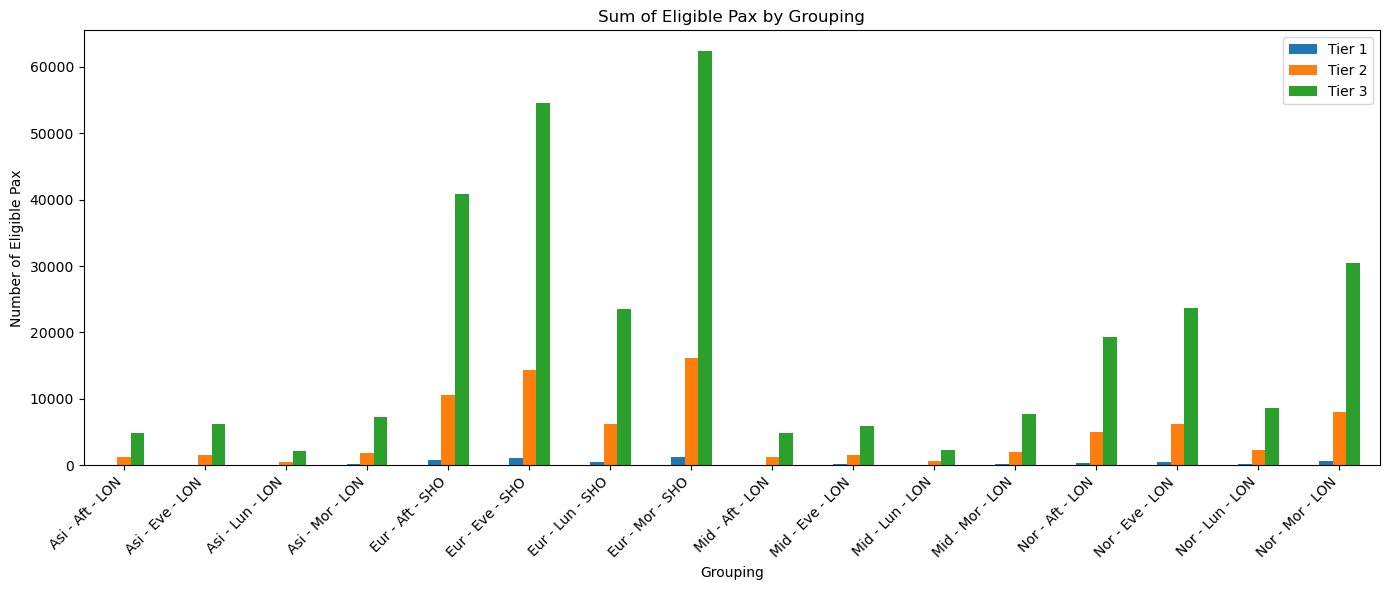

In [34]:
import matplotlib.pyplot as plt

grouped_sum[['TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']].plot(kind='bar', figsize=(14, 6))
plt.title('Sum of Eligible Pax by Grouping')
plt.xlabel('Grouping')
plt.ylabel('Number of Eligible Pax')
plt.xticks(rotation=45, ha='right')
plt.legend(['Tier 1', 'Tier 2', 'Tier 3'])
plt.tight_layout()
plt.show()

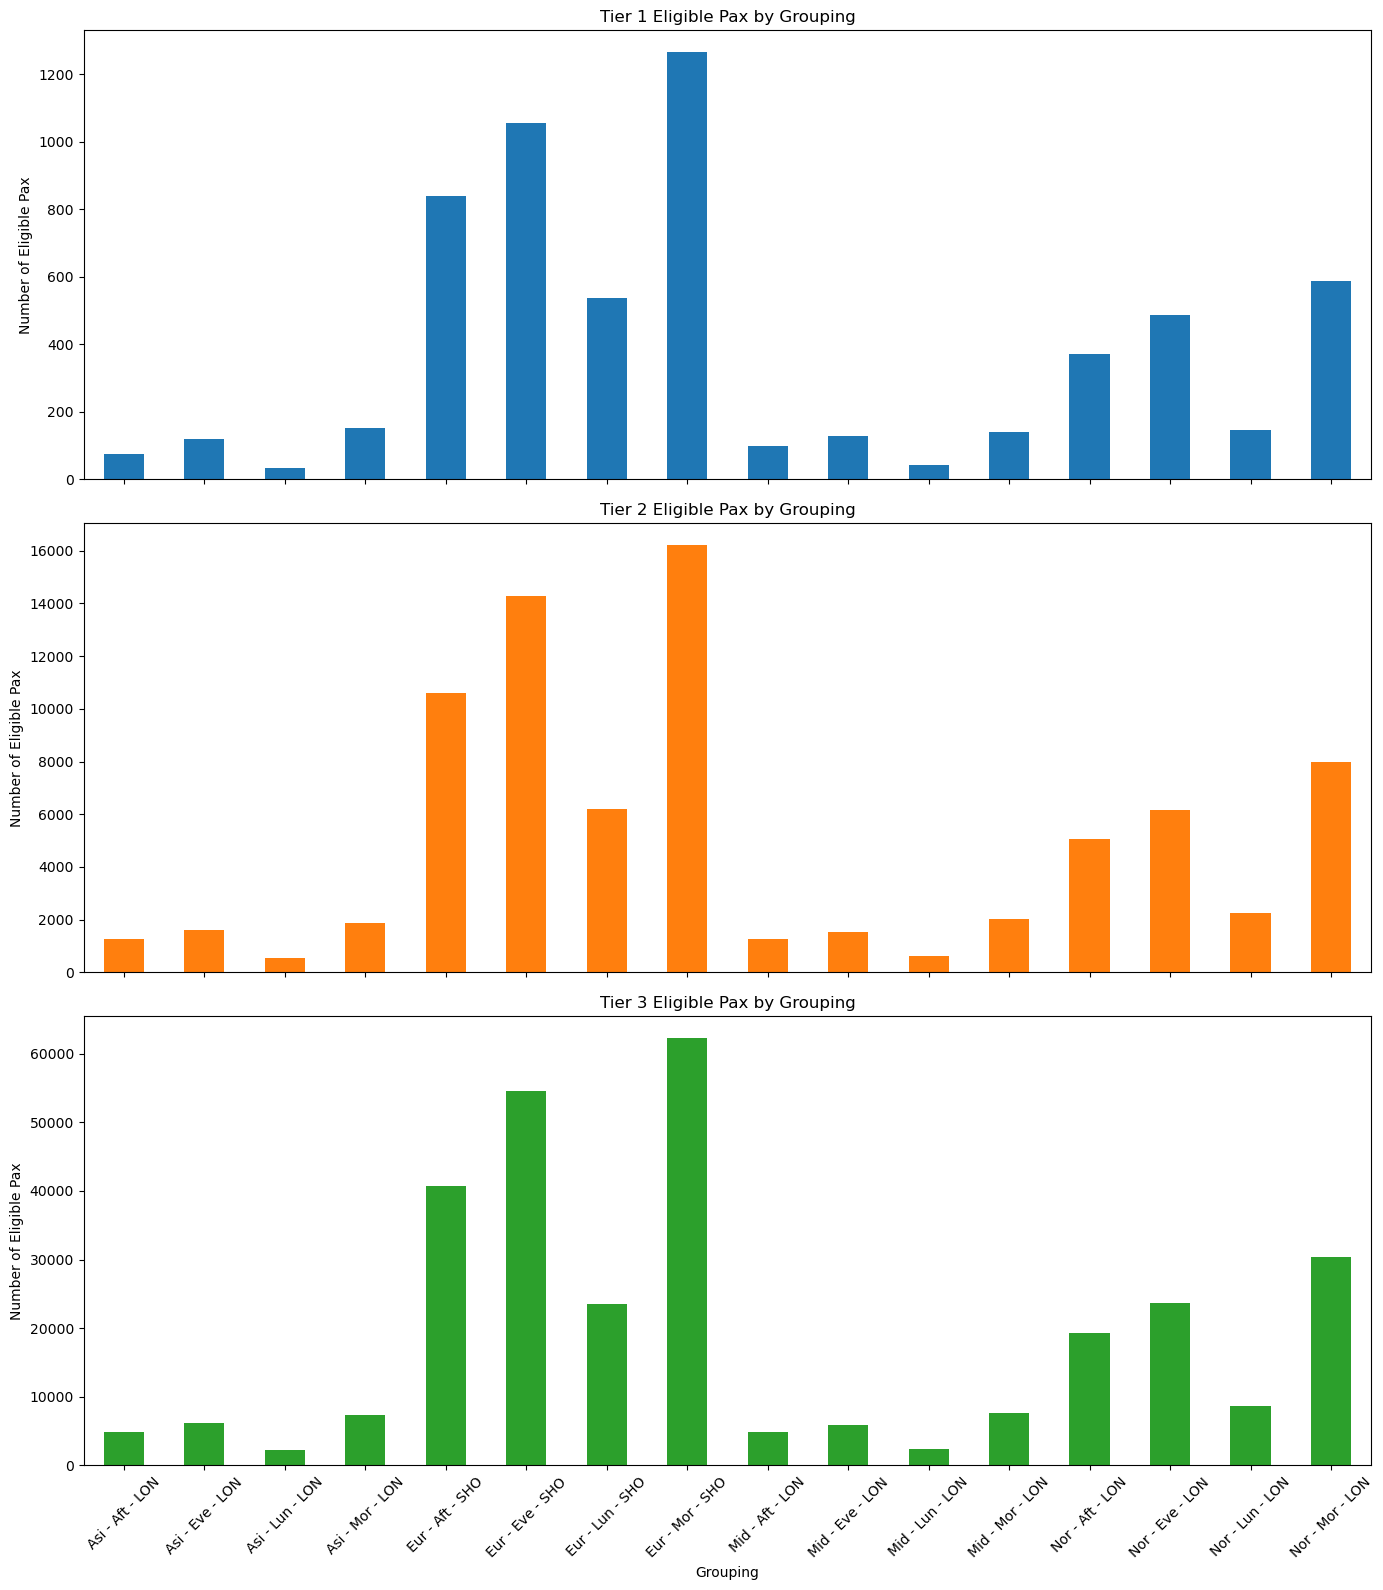

In [35]:
fig, axes = plt.subplots(3, 1, figsize=(14, 16), sharex=True)

tiers = ['TIER1_ELIGIBLE_PAX', 'TIER2_ELIGIBLE_PAX', 'TIER3_ELIGIBLE_PAX']
titles = ['Tier 1 Eligible Pax by Grouping', 'Tier 2 Eligible Pax by Grouping', 'Tier 3 Eligible Pax by Grouping']

for i, (tier, title) in enumerate(zip(tiers, titles)):
    grouped_sum[tier].plot(kind='bar', ax=axes[i], color=f'C{i}')
    axes[i].set_title(title)
    axes[i].set_ylabel('Number of Eligible Pax')
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=45)

axes[-1].set_xlabel('Grouping')
plt.tight_layout()
plt.show()

# Summary


The analysis provides insights into the distribution and characteristics of eligible passengers, supporting further business or operational decisions.
# Detailed Analysis Description

This notebook provides a comprehensive analysis of passenger eligibility data sourced from the `ba.xlsx` dataset. The steps and rationale are as follows:

1. **Data Loading**
   - Utilized the `pandas` library to import the Excel file into a DataFrame, enabling efficient data manipulation and analysis.

2. **Initial Exploration**
   - Displayed the first few rows to understand the structure and contents of the dataset.
   - Used summary statistics and `.info()` to check for missing values, data types, and overall data quality.

3. **Key Column Summaries**
   - Focused on columns representing eligibility tiers (e.g., Silver, Gold, Bronze).
   - Calculated total counts and proportions for each tier to understand their distribution.

4. **Grouping and Aggregation**
   - Grouped data by relevant categories such as region, time of day (morning, afternoon, evening), and haul type (short-haul, long-haul).
   - Aggregated eligible passenger counts within each group.
   - Computed percentages to compare eligibility rates across different segments.

5. **Visualization**
   - Created bar plots using libraries like `matplotlib` or `seaborn` to visualize the distribution of eligible passengers by group.
   - Visualizations helped identify trends and outliers in eligibility across regions, times, and haul types.

6. **Additional Insights**
   - Extracted and listed unique arrival countries for each group to provide further context on passenger demographics.
   - Highlighted any notable patterns or anomalies discovered during the analysis.

This structured approach ensures a thorough understanding of the dataset, enabling data-driven decisions and deeper business insights.